In [1]:
# import necessary modules
import geopandas as gpd
from shapely.geometry import Point
import xarray as xr
import geoplot
import pandas as pd
pd.set_option('max_columns', 50)
import re
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
country = 'Uganda'

In [2]:
def cut_xarray(ds, var, extent):
    """
    Make a geographically bounded cut out of a specific variable in an xarray dataset
    Input:
        ds: xarray dataset
        var: - string variable name
        extent: tuple containing extent as (xmin, xmax, ymin, ymax)
    """
    ds_var = ds[var]
    xmin, xmax, ymin, ymax = extent
    return ds_var.sel(lat=slice(ymax, ymin), lon=slice(xmin, xmax), time=slice('2000-01-01', '2018-12-31'))


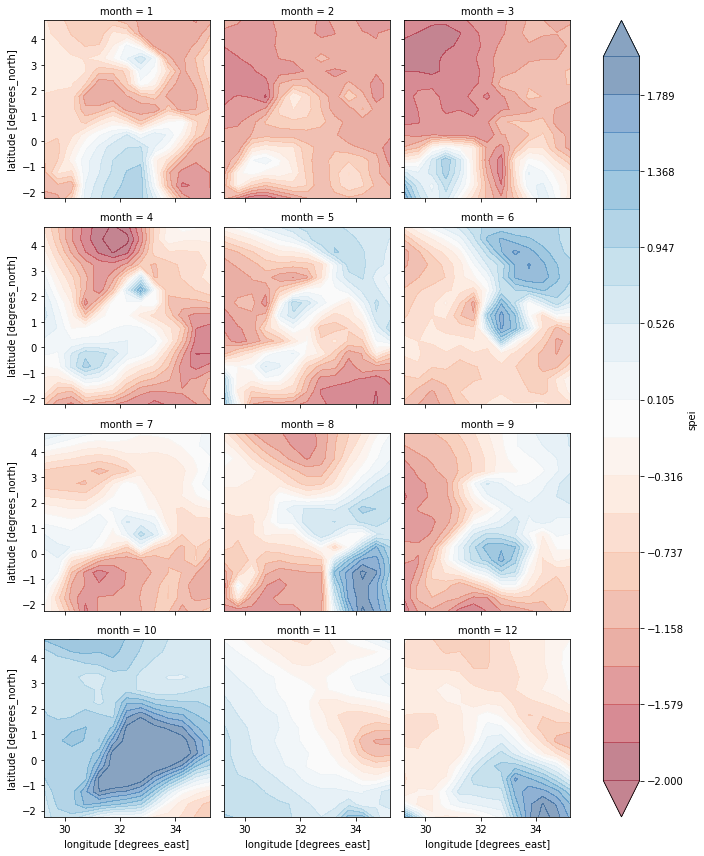

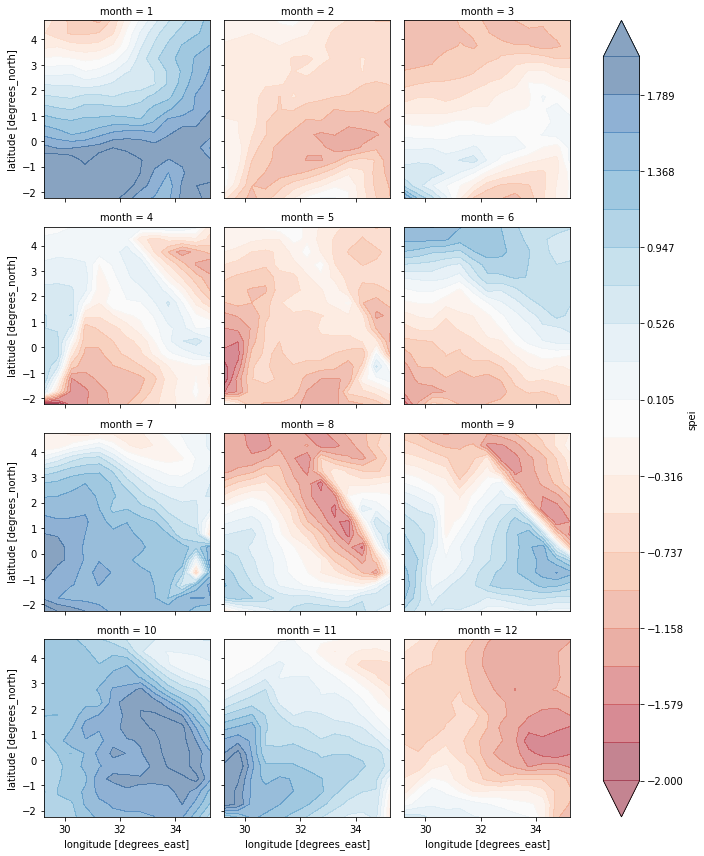

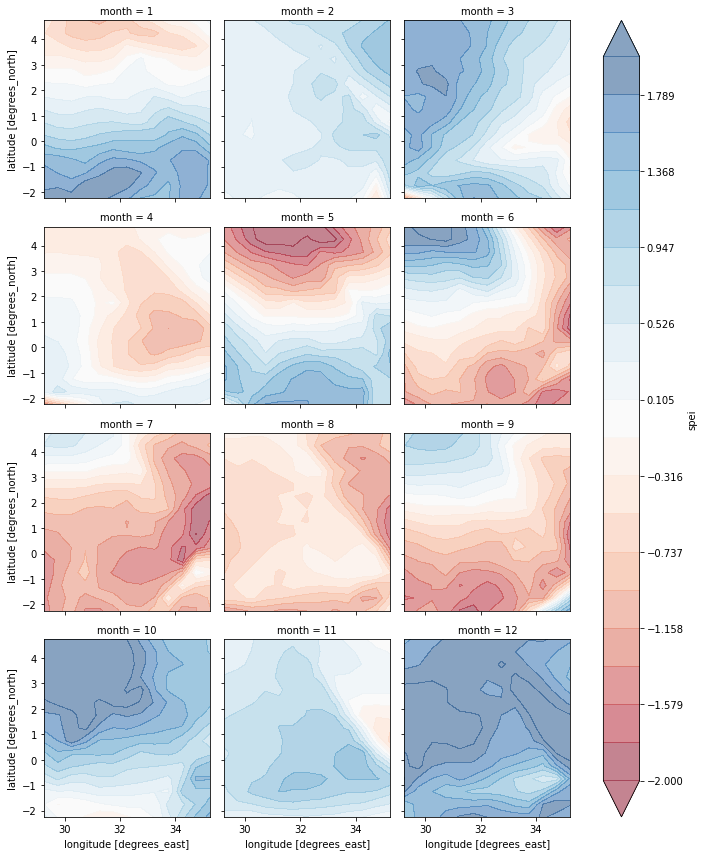

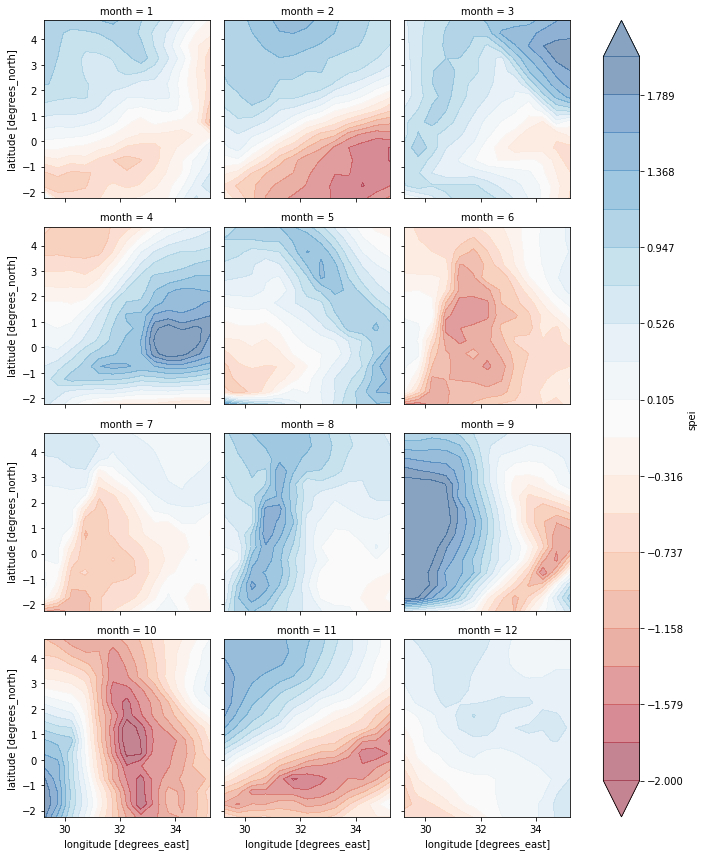

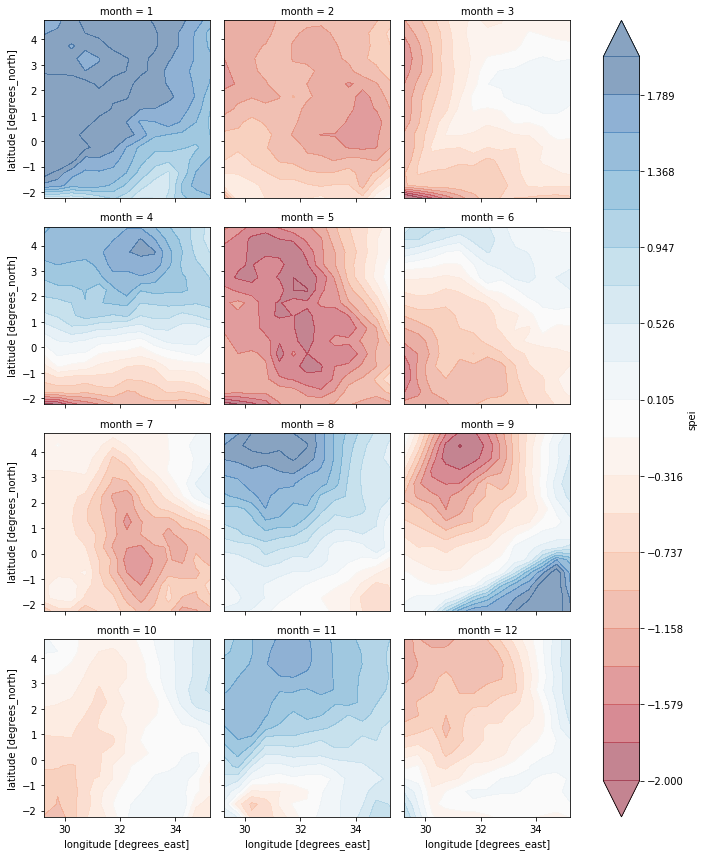

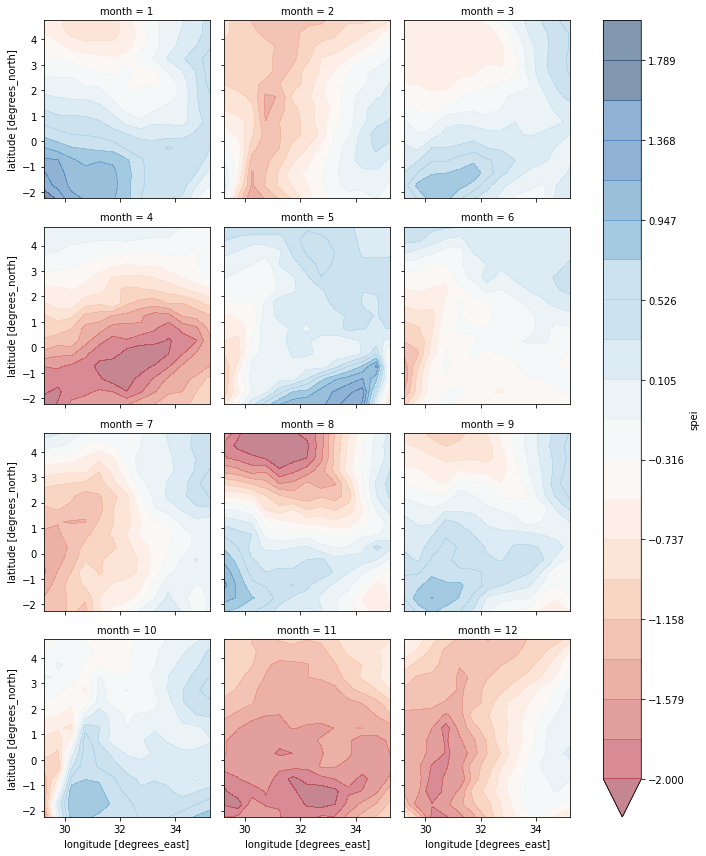

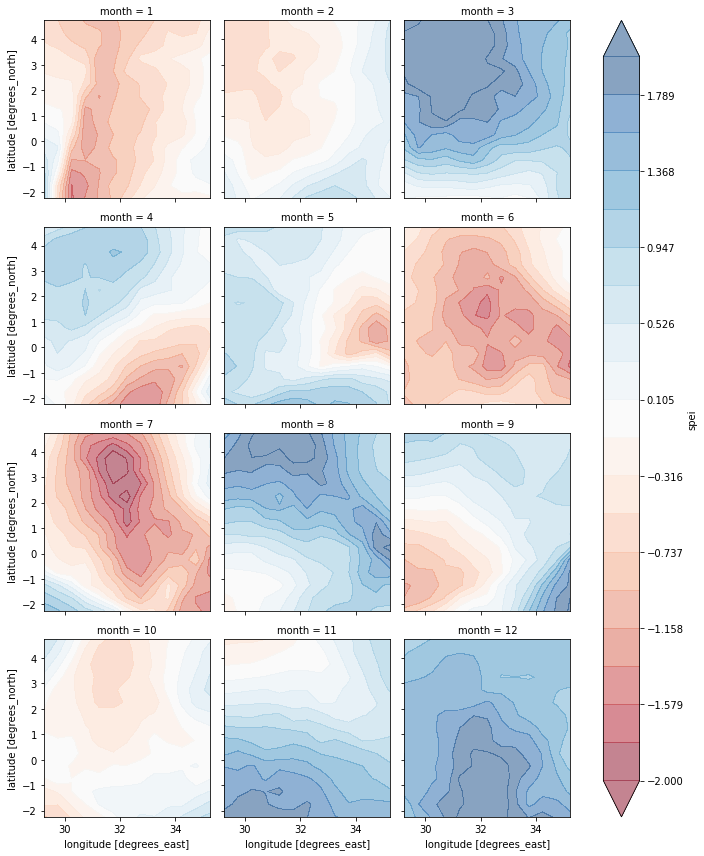

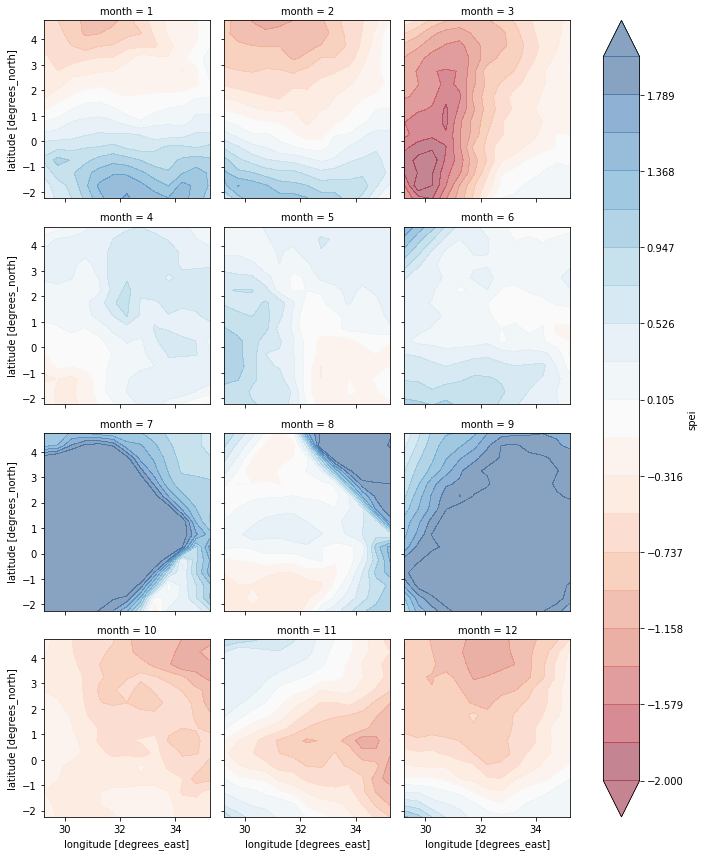

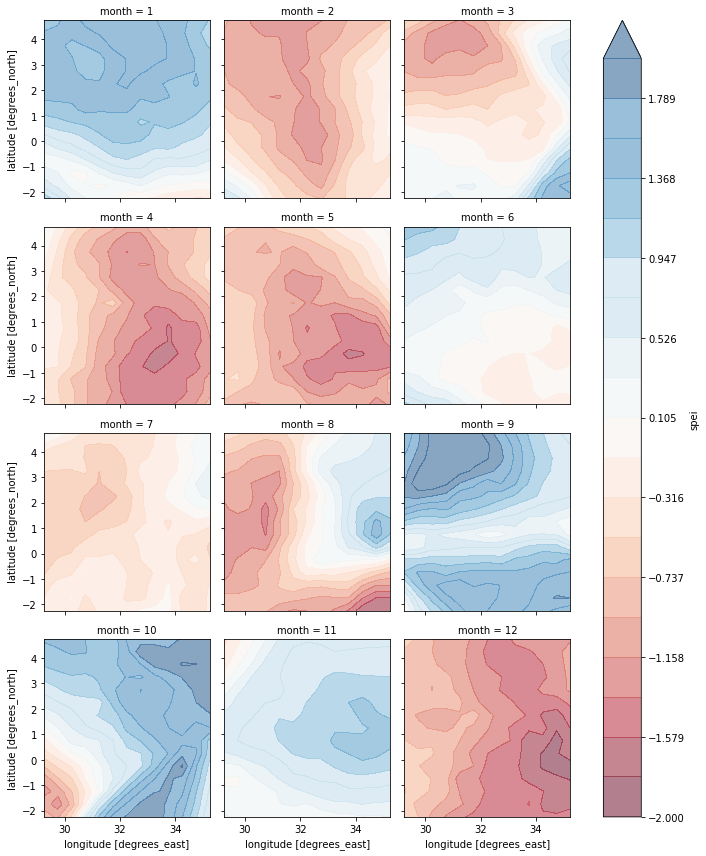

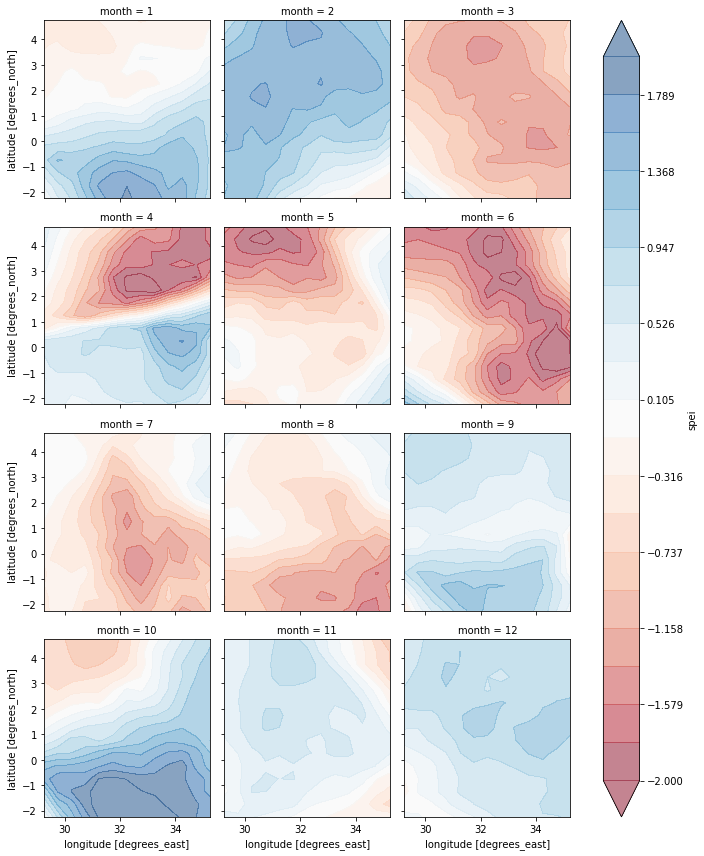

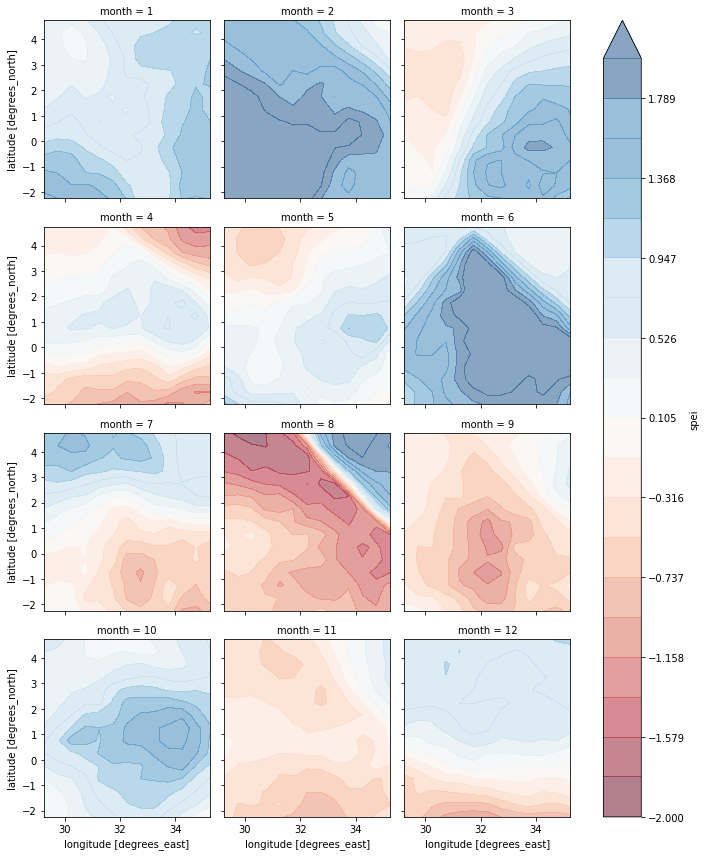

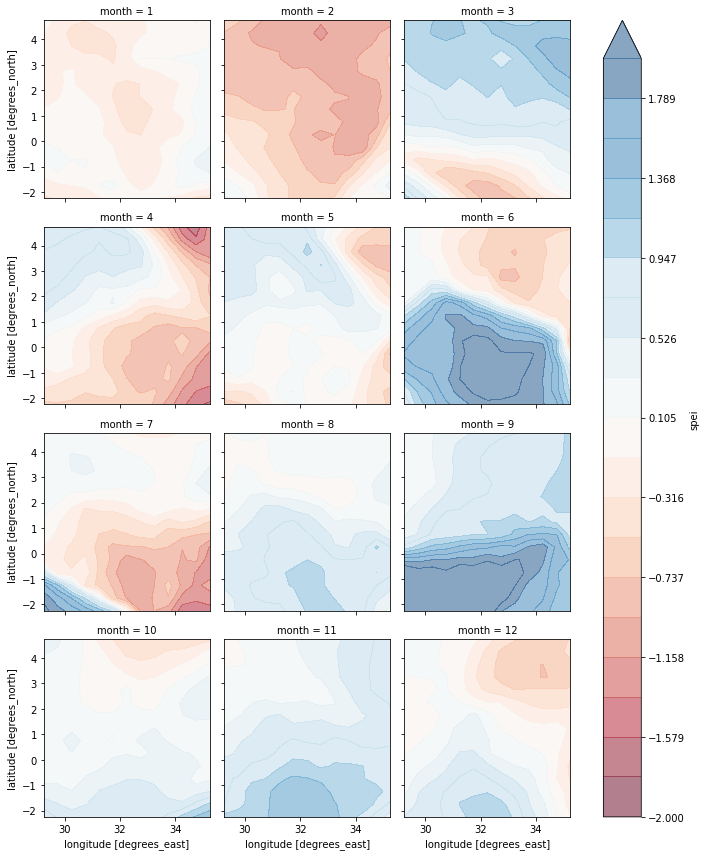

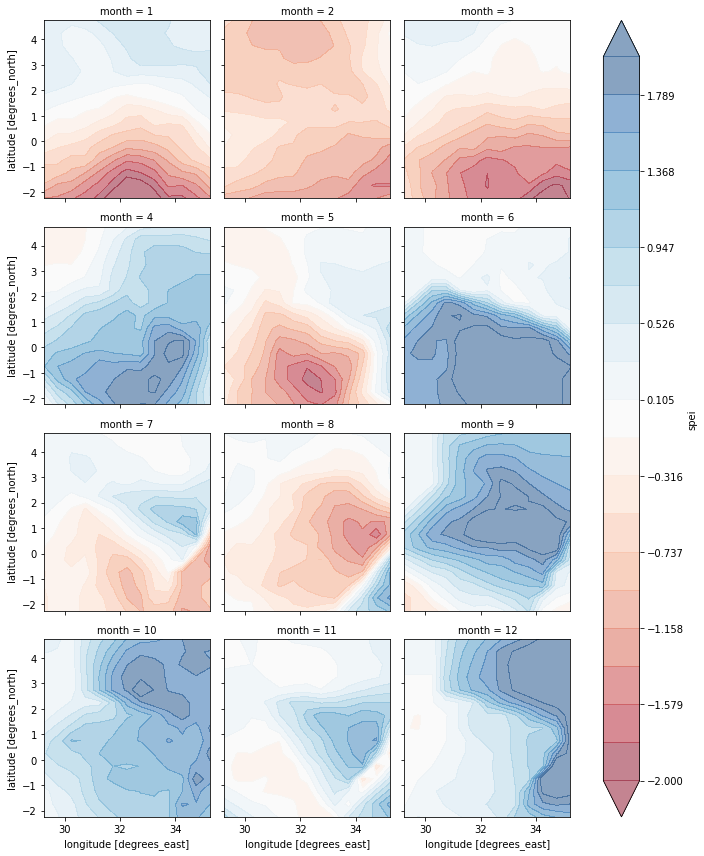

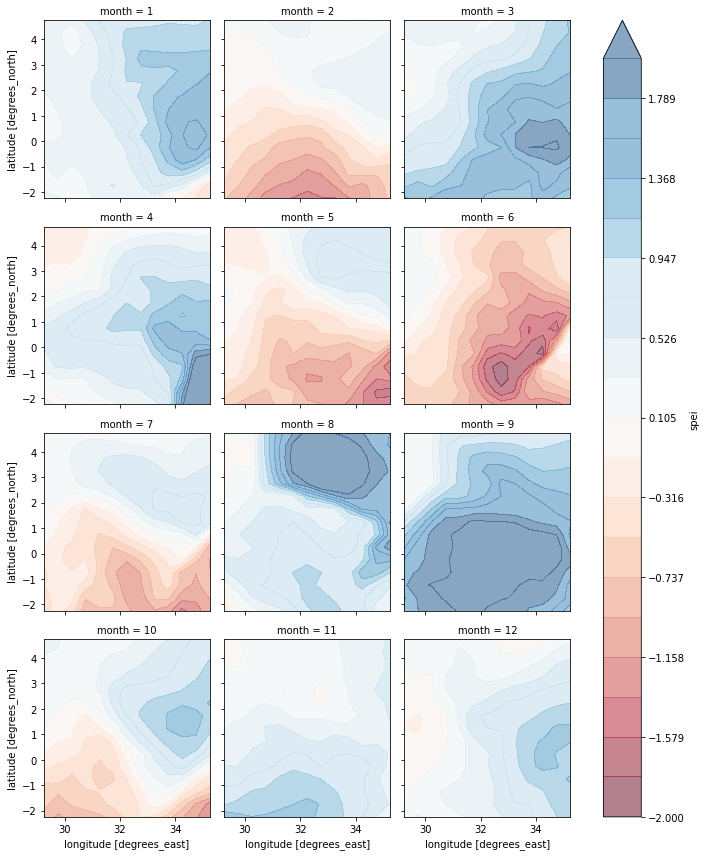

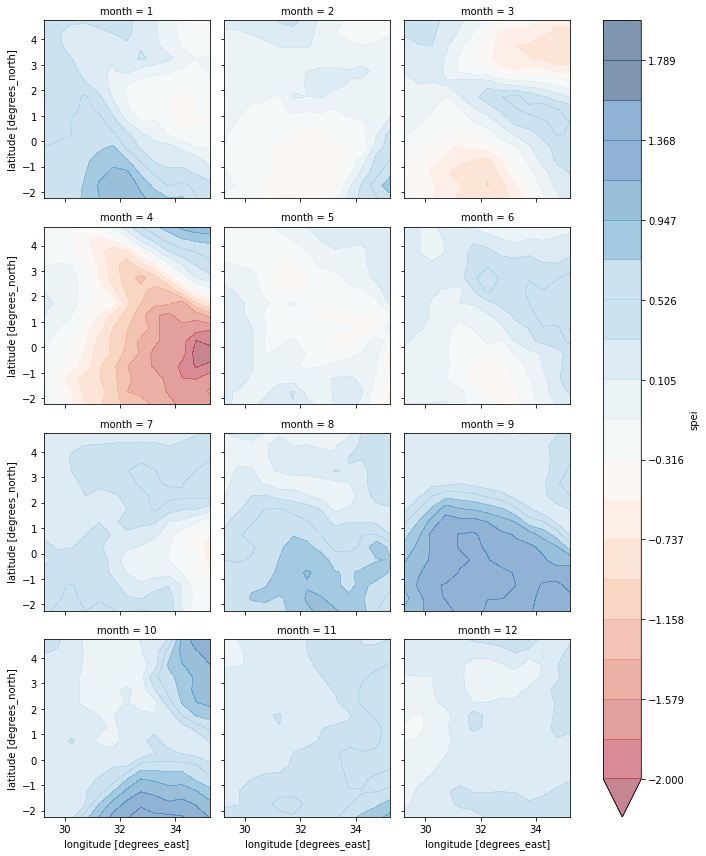

In [4]:
ds = xr.open_dataset(r'C:\Users\MPanis\Documents\IARP\spei01.nc')

var = 'spei'
extent = (29., 35.5, 5., -2.5,)
ds = cut_xarray(ds, var, extent)

#Climatology 
for time in range(2000,2015): 
    ds_year = ds.sel(time=slice(str(time) + '-01-01', str(time) +'-12-31'))
    ds_year = ds_year.groupby('time.month').mean(dim='time')
    gdf_map = ds_year.plot.contourf(row='month', col_wrap=3, vmin=-2, vmax=2, alpha=0.5, levels=20, cmap='RdBu')

    #plt.savefig(r'C:\Users\MPanis\Documents\510 Documents\Python scripts\maps\Climatology\SPEI\climatology_uganda_SPEI_'+str(time)+'.png')

In [ ]:
ds = xr.open_dataset('https://www.oceancolour.org/thredds/dodsC/test/chirps-v2.0.monthly.nc')

var = 'precip'
extent = (29., 35.5, 5., -2.5,)

m = 1.
if 'latitude' in ds.dims:
    ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})
ds = cut_xarray(ds, var, extent)

#Climatology 
for times in range(2000,2015): 
    std = ds.std('time')
    all_avg = ds.groupby('time.month').mean(dim='time')
    
    ds_year = ds.sel(time=slice(str(times) + '-01-01', str(times) +'-12-31'))
    ds_year = ds_year.groupby('time.month').mean(dim='time')

    anomaly = (ds_year - all_avg) / std
    gdf_map = anomaly.plot.contourf(row='month', col_wrap=3, vmin=-2, vmax=2, alpha=0.5, levels=20, cmap='RdBu')

    #plt.savefig(r'C:\Users\MPanis\Documents\510 Documents\Python scripts\maps\Climatology\CHIRPS\climatology_uganda_P_'+str(times)+'.png')